In [1]:
import music21 as m21

In [2]:
bach_corpus = m21.corpus.search('bach', fileExtensions='xml')
score = bach_corpus[0].parse()

In [3]:
# Variable für die Bass-Stimme des Stücks
bass_part = score.parts[4]
print(bass_part.partName)

Bass


In [4]:
# Liste für alle Noten der Bass-Stimme mit ihrem jeweiligen Offset-Wert
bass_notes_list = []

for note in bass_part.flatten().getElementsByClass(m21.note.Note):
    bass_notes_list.append((note, note.offset))

In [5]:
print(bass_notes_list)

[(<music21.note.Note F>, 0.0), (<music21.note.Note E>, 1.0), (<music21.note.Note F>, 2.0), (<music21.note.Note D>, 3.0), (<music21.note.Note A>, 4.0), (<music21.note.Note B->, 5.0), (<music21.note.Note C>, 5.5), (<music21.note.Note D>, 6.0), (<music21.note.Note E>, 6.5), (<music21.note.Note F>, 7.0), (<music21.note.Note F>, 8.0), (<music21.note.Note B->, 9.0), (<music21.note.Note A>, 10.0), (<music21.note.Note G>, 10.5), (<music21.note.Note A>, 11.0), (<music21.note.Note B>, 11.5), (<music21.note.Note C>, 12.0), (<music21.note.Note F>, 13.0), (<music21.note.Note G>, 14.0), (<music21.note.Note C>, 15.0), (<music21.note.Note F>, 16.0), (<music21.note.Note B->, 17.0), (<music21.note.Note C>, 18.0), (<music21.note.Note D>, 19.0), (<music21.note.Note E>, 19.5), (<music21.note.Note F>, 20.0), (<music21.note.Note C>, 21.0), (<music21.note.Note F>, 23.0), (<music21.note.Note F>, 24.0), (<music21.note.Note E>, 25.0), (<music21.note.Note F>, 26.0), (<music21.note.Note D>, 27.0), (<music21.note.N

In [6]:
chordified_score = score.chordify()

In [8]:
# Liste für alle harmonischen Beschriftungen zusammen mit dem jeweiligen Offset-Wert des Akkords
chord_labels_list = []

for object in chordified_score.flatten():

    if isinstance(object, m21.chord.Chord):
        chord_labels_list.append((m21.roman.romanNumeralFromChord(object).figure, object.offset))
print(chord_labels_list)

[('I', 0.0), ('I6', 1.0), ('I6', 1.5), ('I', 2.0), ('I', 2.5), ('i', 3.0), ('i', 3.5), ('I6', 4.0), ('I6', 4.5), ('I', 5.0), ('I', 5.25), ('I7642', 5.5), ('i7542', 5.75), ('I6', 6.0), ('iø7b53b2', 6.5), ('I', 7.0), ('I', 8.0), ('I', 9.0), ('i65', 9.5), ('I7', 9.75), ('io75b2', 10.0), ('I64b3', 10.5), ('io6', 10.75), ('I6', 11.0), ('I6b5', 11.5), ('I', 12.0), ('I', 12.5), ('i65', 13.0), ('iø7643', 13.5), ('i763', 13.75), ('I', 14.0), ('I', 15.0), ('I', 16.0), ('I', 16.5), ('I', 17.0), ('i65', 17.5), ('i6', 18.0), ('i65', 18.5), ('I65', 19.0), ('I6b5', 19.5), ('I', 20.0), ('I', 20.5), ('i54', 21.0), ('I654', 21.5), ('I654', 21.75), ('Ib753', 22.0), ('Ib753', 22.5), ('Ib753', 22.75), ('I', 23.0), ('I', 24.0), ('I6', 25.0), ('I6', 25.5), ('I', 26.0), ('I', 26.5), ('i', 27.0), ('i', 27.5), ('I6', 28.0), ('I6', 28.5), ('I', 29.0), ('I', 29.25), ('I7642', 29.5), ('i7542', 29.75), ('I6', 30.0), ('iø7b53b2', 30.5), ('I', 31.0), ('I', 32.0), ('I', 33.0), ('i65', 33.5), ('I7', 33.75), ('io75b2', 

In [12]:
for label, offset in chord_labels_list:
    if bass_notes_list[0][1] == offset:
        current_bass_note_tuple = bass_notes_list.pop(0)
        current_bass_note = current_bass_note_tuple[0]
        current_bass_note.addLyric(label)

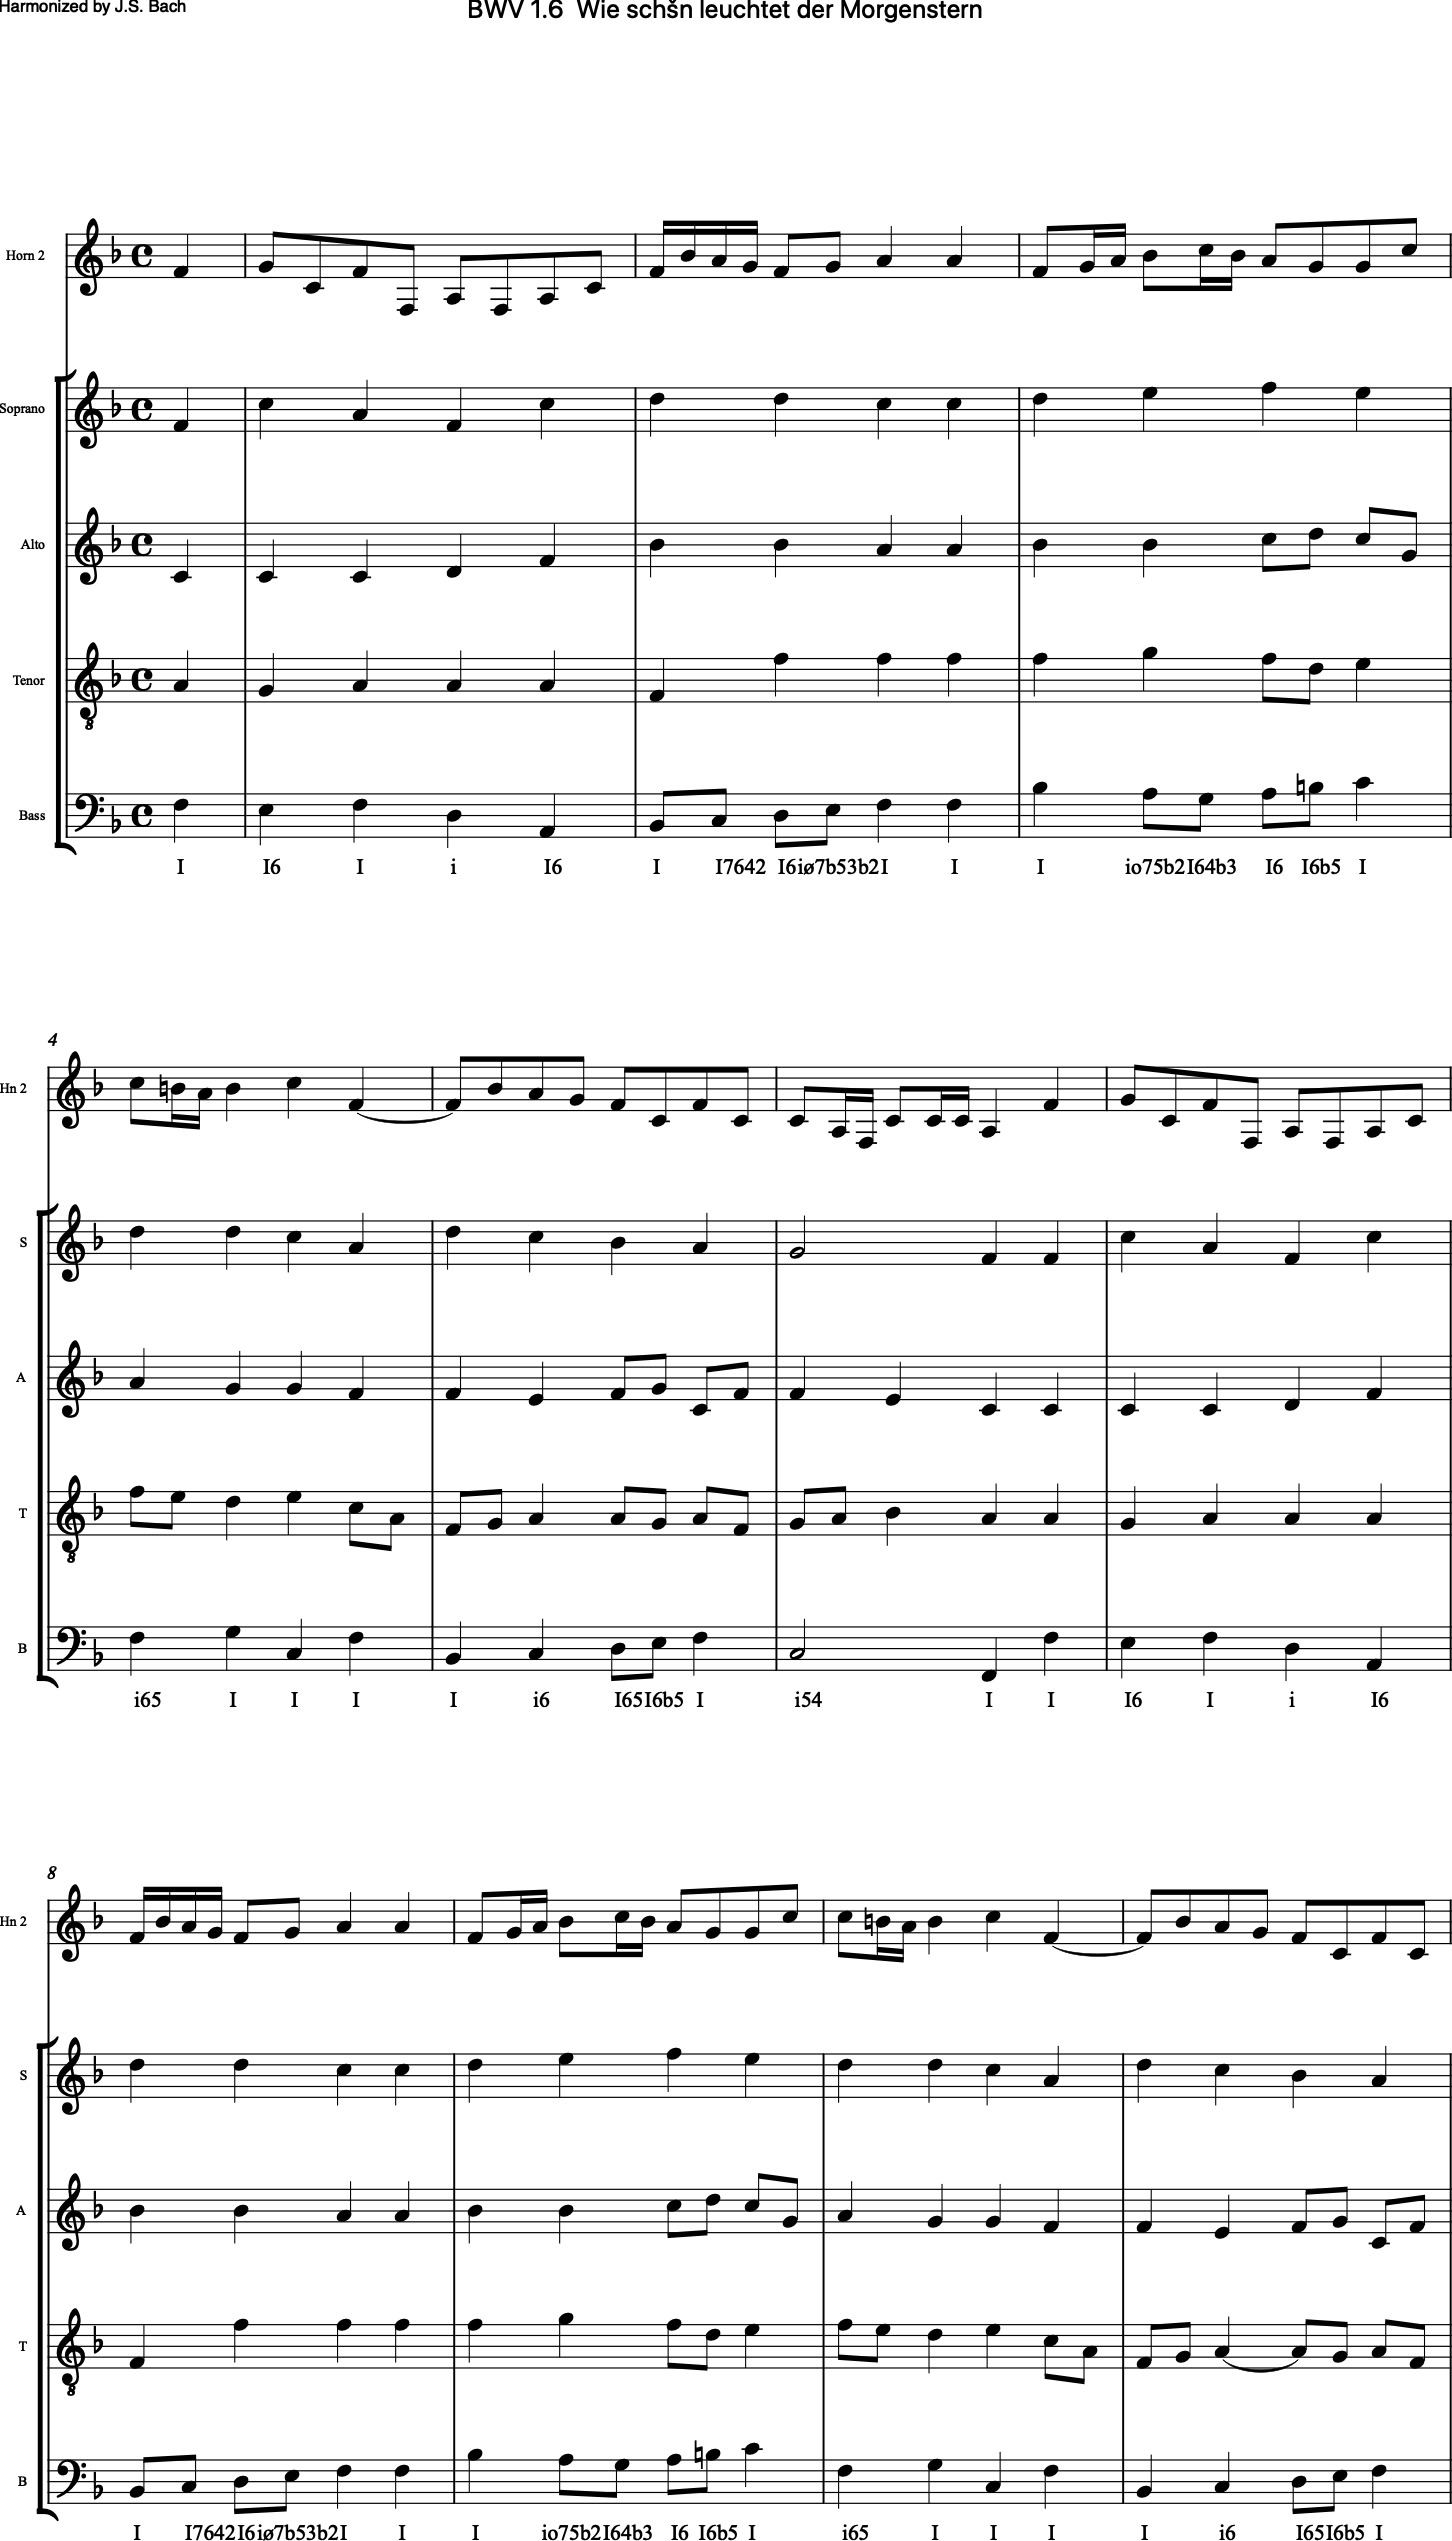

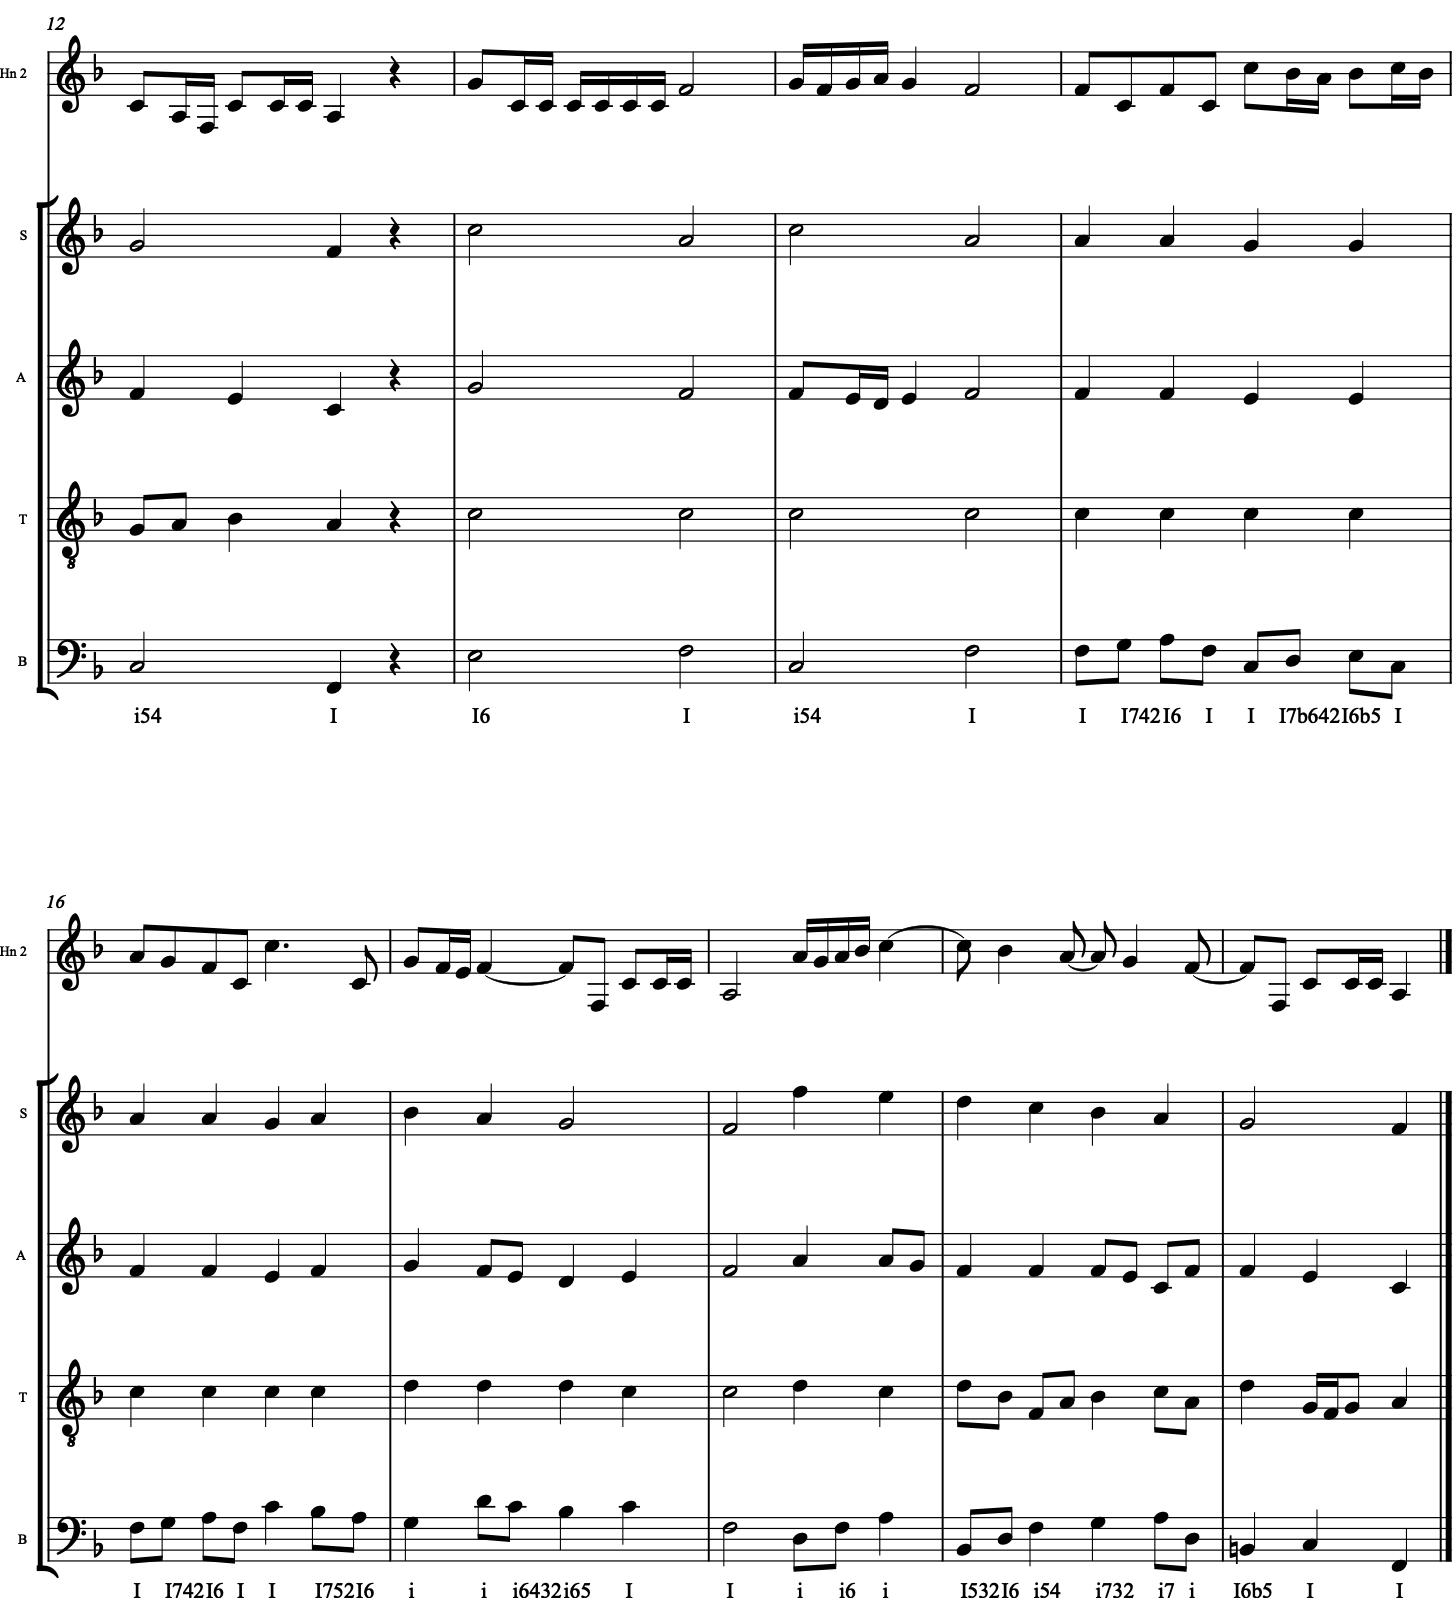

In [13]:
score.show()